# Basic Symbolic Quantum Mechanics

In [1]:
from sympy import init_printing
init_printing(use_latex=True)

In [2]:
from sympy import sqrt, symbols, Rational, srepr
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

/Users/bgranger/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/bgranger/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Bras and kets

Symbolic kets can be created using the `Ket` class as seen here:

In [3]:
phi, psi = Ket('phi'), Ket('psi')

These ket instances are fully symbolic and behave exactly like the corresponding mathematical entities.
For example, one can form a linear combination using addition and scalar multiplication:

In [4]:
alpha = Symbol('alpha', complex=True)
beta = Symbol('beta', complex=True)
state = alpha*psi + beta*phi; state

Bras can be created using the `Bra` class directly or by using the `Dagger` class
on an expression involving kets:

In [5]:
ip = Dagger(state)*state; ip

Because this is a standard SymPy expression, we can use standard SymPy functions and methods
for manipulating expression. Here we use expand to multiply this expression out, followed
by `qapply` which identifies inner and outer products in an expression.

In [6]:
qapply(expand(ip))

## Operators

SymPy also has a full set of classes for handling symbolic operators.  Here we create three operators,
one of which is hermitian:

In [7]:
A = Operator('A')
B = Operator('B')
C = HermitianOperator('C')

When used in arithmetic expressions SymPy knows that operators do not commute under
multiplication/composition as is seen by expanding a polynomial of operators:

In [8]:
expand((A+B)**2)

Commutators of operators can also be created:

In [9]:
comm = Commutator(A*B,B+C); comm

The `expand` function has custom logic for expanding commutators using standard commutator
relations:

In [10]:
comm.expand(commutator=True)

Any commutator can be performed ($[A,B]\rightarrow AB-BA$) using the `doit` method:

In [11]:
_.doit().expand()

The `Dagger` class also works with operators and is aware of the properties of unitary
and hermitian operators:

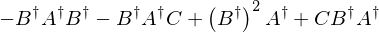

In [12]:
Dagger(_)

## Tensor products

Symbolic tensor products of operators and states can also be created and manipulated:

In [13]:
op = TensorProduct(A,B+C)
state = TensorProduct(psi,phi)
op*state

Once a tensor product has been created, it can be simplified,

In [14]:
tensor_product_simp(_)

and expanded:

In [15]:
expand(_)